In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
df2 = pd.read_pickle(
    '/Users/okankoklu/Desktop/EXETER/Year 3/BEM3064 Data Viz/DATAVIZ PROJECT/sentiment_analysis.pkl')

display(df2)

,id,date,number_of_replies,number_of_retweets,number_of_likes,language,raw_content,longitude,latitude,country,detected_language,polarity_score
0,1646333442651717633,2023-04-13 02:04:14+00:00,0,0,5,en,@user I noticed that electric car quit in the ...,-118.063298,33.791963,United States,en,0.000000
1,1646044706776793088,2023-04-12 06:56:54+00:00,1,0,5,en,Many of you ask me about my experience with my...,-3.952603,40.377576,Spain,en,0.500000
2,1645731911191461894,2023-04-11 10:13:58+00:00,1,0,5,en,@user It's pennies mate £600 rent/mortgage £20...,-7.660857,54.633631,United Kingdom,en,0.000000
3,1645665048436805632,2023-04-11 05:48:17+00:00,0,3,14,en,@user Dreaming here as electric cars are not ...,152.668523,-27.767441,Australia,en,0.133333
4,1645150581638438914,2023-04-09 19:43:58+00:00,0,0,3,en,"@user @user Looking good! Yeah, I do enjoy th...",-83.675290,36.540739,United States,en,0.478906
...,...,...,...,...,...,...,...,...,...,...,...,...
8888,1172199659101724672,2019-09-12 17:25:51+00:00,3,3,20,de,"@user @user @user Und mit ""Verkehrswende"" mein...",13.088304,52.338079,Germany,de,0.000000
8889,1306479802925318145,2020-09-17 06:27:12+00:00,1,0,2,nl,@user Wij hebben een 30tal H2-wagens rondrijde...,4.172376,50.689144,Belgium,nl,0.000000
8890,1607705706701983746,2022-12-27 11:51:24+00:00,3,0,9,nl,@user @user @user 1) Het is in de zomer drukke...,0.340613,44.619356,France,nl,0.000000
8892,1427967707471925254,2021-08-18 12:16:46+00:00,5,0,9,nl,@user @user Het pijnpunt zit hem in het feit d...,6.464595,51.853814,Germany,nl,0.000000


## Visualisation

- overview of where tweets were scraped from
- creating an interactive dashboard

In [3]:
# Replacing with common country names between dataframes

df2['country'] = (df2['country']
                                 .str.replace('United States', 'United States of America')
                                 .str.replace('Russian Federation', 'Russia')
                                 .str.replace('Dominican Republic', 'Dominican Rep.')
                                 .str.replace('Congo, The Democratic Republic of the', 'Democratic Republic of the Congo')
                                 .str.replace('Venezuela, Bolivarian Republic of', 'Venezuela')
                                 .str.replace('Tanzania, United Republic of', 'United Republic of Tanzania')
                                 .str.replace('Iran, Islamic Republic of', 'Iran')
                                 .str.replace('Taiwan, Province of China', 'Taiwan')
                                 .str.replace('Korea, Republic of', 'South Korea')
                                 .str.replace('Czechia', 'Czech Republic'))


In [4]:
# Plotting average polarity scores for each country

country_polarity_avgs = df2.groupby(['country'], as_index=False)[
    'polarity_score'].mean()
country_polarity_avgs = (df2
                         .groupby(['country'], as_index=False)['polarity_score']
                         .mean()
                         .rename(columns={'country': 'name', 'polarity_score': 'avg_polarity_score'}))

# Obtaining the World Map

worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
worldmap = worldmap[worldmap['continent'] != 'Antarctica']
worldmap2 = pd.merge(
    left=worldmap, right=country_polarity_avgs, how='left', on='name')
worldmap2['avg_polarity_score'] = pd.to_numeric(
    worldmap2['avg_polarity_score'], errors='coerce')

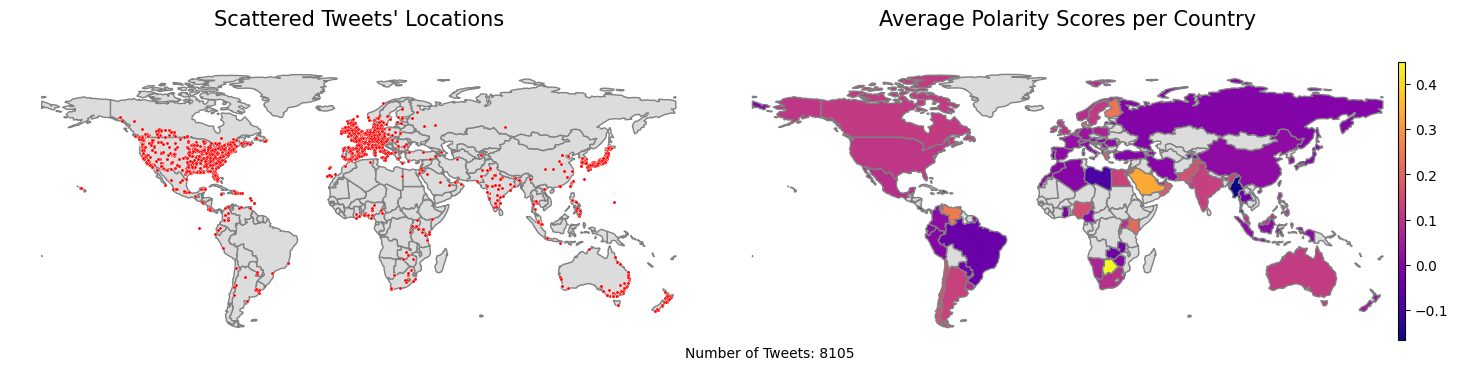

In [5]:
# Subplots

number_of_tweets = df2['id'].nunique()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(
    18, 10), gridspec_kw={'width_ratios': [1, 1]})
fig.suptitle(f'Number of Tweets: {number_of_tweets}',
             horizontalalignment='left', y=0.35, fontsize=10)

divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="1%", pad=-0.3)

plt.subplots_adjust(wspace=0, hspace=0)

worldmap2.plot(ax=ax1, color='gainsboro', edgecolor='grey')
sns.scatterplot(data=df2, y='latitude', x='longitude',
                ax=ax1, marker='o', color='red', s=5)
ax1.set_title(
    "Scattered Tweets' Locations", fontsize=15, y=1.1)
ax1.axis('off')

worldmap2.plot(column='avg_polarity_score', cmap='plasma', ax=ax2, cax=cax2, legend=True, legend_kwds={
               'shrink': 0.4}, missing_kwds={'color': 'gainsboro', 'label': 'N/A'}, edgecolor='grey')
ax2.set_title('Average Polarity Scores per Country', fontsize=15,  y=1.1)
ax2.set_axis_off()


In [6]:
df2.to_pickle(
    '/Users/okankoklu/Desktop/EXETER/Year 3/BEM3064 Data Viz/DATAVIZ PROJECT/tweets_dataframe.pkl')

country_geometries = worldmap2[['name', 'geometry']]
country_polarity_avgs = pd.merge(
    left=country_polarity_avgs, right=country_geometries, on='name', how='left')
country_polarity_avgs.to_pickle(
    '/Users/okankoklu/Desktop/EXETER/Year 3/BEM3064 Data Viz/DATAVIZ PROJECT/country_polarity_avgs.pkl')


In [7]:
df2

,id,date,number_of_replies,number_of_retweets,number_of_likes,language,raw_content,longitude,latitude,country,detected_language,polarity_score
0,1646333442651717633,2023-04-13 02:04:14+00:00,0,0,5,en,@user I noticed that electric car quit in the ...,-118.063298,33.791963,United States of America,en,0.000000
1,1646044706776793088,2023-04-12 06:56:54+00:00,1,0,5,en,Many of you ask me about my experience with my...,-3.952603,40.377576,Spain,en,0.500000
2,1645731911191461894,2023-04-11 10:13:58+00:00,1,0,5,en,@user It's pennies mate £600 rent/mortgage £20...,-7.660857,54.633631,United Kingdom,en,0.000000
3,1645665048436805632,2023-04-11 05:48:17+00:00,0,3,14,en,@user Dreaming here as electric cars are not ...,152.668523,-27.767441,Australia,en,0.133333
4,1645150581638438914,2023-04-09 19:43:58+00:00,0,0,3,en,"@user @user Looking good! Yeah, I do enjoy th...",-83.675290,36.540739,United States of America,en,0.478906
...,...,...,...,...,...,...,...,...,...,...,...,...
8888,1172199659101724672,2019-09-12 17:25:51+00:00,3,3,20,de,"@user @user @user Und mit ""Verkehrswende"" mein...",13.088304,52.338079,Germany,de,0.000000
8889,1306479802925318145,2020-09-17 06:27:12+00:00,1,0,2,nl,@user Wij hebben een 30tal H2-wagens rondrijde...,4.172376,50.689144,Belgium,nl,0.000000
8890,1607705706701983746,2022-12-27 11:51:24+00:00,3,0,9,nl,@user @user @user 1) Het is in de zomer drukke...,0.340613,44.619356,France,nl,0.000000
8892,1427967707471925254,2021-08-18 12:16:46+00:00,5,0,9,nl,@user @user Het pijnpunt zit hem in het feit d...,6.464595,51.853814,Germany,nl,0.000000


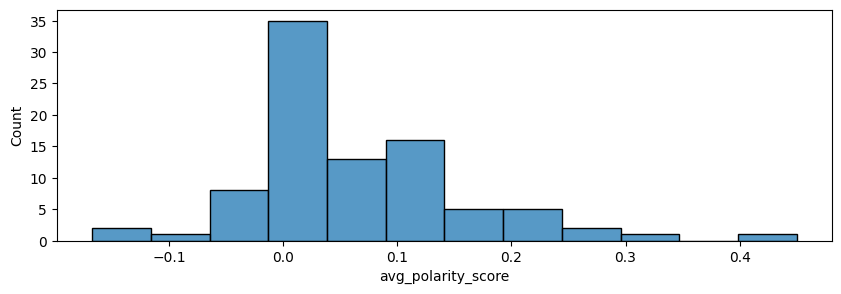

In [8]:
plt.figure(figsize=(10,3))
sns.histplot(data=country_polarity_avgs, x='avg_polarity_score')
plt.show()


In [12]:
df3 = df2.copy()

df3['date'] = df3['date'].dt.tz_localize(None)

In [14]:
df3.to_csv('/Users/okankoklu/Desktop/Bem3063_DataViz_Project/4tweet_data.csv')

In [10]:
# df3.to_excel('/Users/okankoklu/Desktop/EXETER/Year 3/BEM3064 Data Viz/tweet_data.xlsx', index=False)

In [15]:
df3.to_csv('/Users/okankoklu/Desktop/Bem3063_DataViz_Project/5tweet_data.csv', index=False)